# Thực hiện một mạng neural đơn giản dùng Pytorch
Bài toán: Dùng Pytorch tạo 1 ANN classifier phân loại hoa Iris

## Bước 1: Đọc các thư viện cần thiết

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Các thư viện thường dùng khi train ANN đơn giản với Pytorch

In [6]:
import torch
import torch.nn as nn

In [7]:
from torch.utils.data import DataLoader, TensorDataset # Chuyển dữ liệu sang dạng của pytorch để đưa vào train


## Bước 2: Tải dữ liệu + Tiền xử lý

In [8]:
# Phương pháp đọc dữ liệu từ drive
dataframe = pd.read_csv('https://drive.google.com/file/d/1nk2WynqEEiAuaAZ3JQL_dlAb6-ZTxgUk/view?usp=sharing')

In [9]:
# Phương pháp đọc dữ liệu từ sckit learn
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data']
y = iris['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Chuẩn hoá dữ liệu

In [11]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)

Để train và sử dụng với pytorch, chúng ta cần chuyển bộ dữ liệu về dạng của pytorch (các tensor)

In [12]:
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)


## Bước 3: Tạo neural network

In [15]:
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.layer2 = nn.Linear(hidden_size_1, hidden_size)
    self.layer3 = nn.Linear(hidden_size, output_size)
  def forward(self, x):
    x = self.layer1(x)
    x = nn.Sigmoid()(x)  # Change to ReLU
    x = self.layer2(x)
    x = nn.Sigmoid()(x)  # Change to ReLU
    x = self.layer3(x)
    x = nn.Softmax(dim=1)(x)
    return x

# Các thông số mạng:
input_size = X_train_norm.shape[1]
hidden_size = 16
hidden_size_1 = 32
output_size = 3
model = Model(input_size, hidden_size, output_size)

Review mạng neuron

In [14]:
%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master
from torchviz import make_dot, make_dot_from_trace

  Cloning https://github.com/szagoruyko/pytorchviz.git (to revision master) to /tmp/pip-req-build-6g6bdos7
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz.git /tmp/pip-req-build-6g6bdos7
  Resolved https://github.com/szagoruyko/pytorchviz.git to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4973 sha256=0a33a0be58158f91240324800080b4d8c4ad85ea367386aa3d9366995e768928
  Stored in directory: /tmp/pip-ephem-wheel-cache-7v4oa5zz/wheels/97/11/17/d09e895f9883bd50923ce86b249a31790356a1b88b280983d8
Successfully built torchviz


In [ ]:
#x = torch.randn(1,input_size)

#make_dot(model(x), params=dict(model.named_parameters()))

In [ ]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Training

In [ ]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist[epoch] += loss.item()*y_batch.size(0)
    is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
    accuracy_hist[epoch] += is_correct.mean()
  loss_hist[epoch] /= len(train_dl.dataset)
  accuracy_hist[epoch] /= len(train_dl.dataset)

Plot results

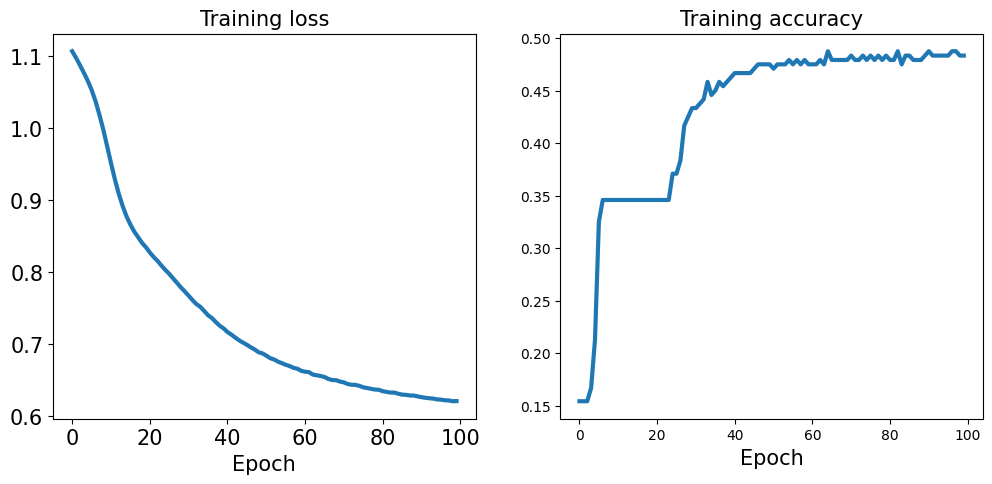

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X = data['data']
y = data['target']
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

class IrisModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(4, 8)
        self.act = nn.ReLU()
        self.output = nn.Linear(8, 3)

    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.output(x)
        return x

# loss metric and optimizer
model = IrisModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# prepare model and training parameters
n_epochs = 100
batch_size = 10
batch_start = torch.arange(0, len(X_train), batch_size)

# training loop
for epoch in range(n_epochs):
    for start in batch_start:
        # take a batch
        X_batch = X_train[start:start+batch_size]
        y_batch = y_train[start:start+batch_size]
        # forward pass
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        # update weights
        optimizer.step()

# validating model
y_pred = model(X_test)
acc = (torch.argmax(y_pred, 1) == y_test).float().mean()
acc = float(acc)*100
print("Model accuracy: %.2f%%" % acc)

Model accuracy: 95.56%
